In [1]:
# Essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install nltk
!pip install wordcloud

In [3]:
df=pd.read_csv('tripadvisor_hotel_reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [4]:
df.isnull().sum()

,0
Review,0
Rating,0


In [5]:
df.duplicated().sum()

0

In [6]:
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [7]:
#Summary Statistics of data
print(df.describe())

             Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000


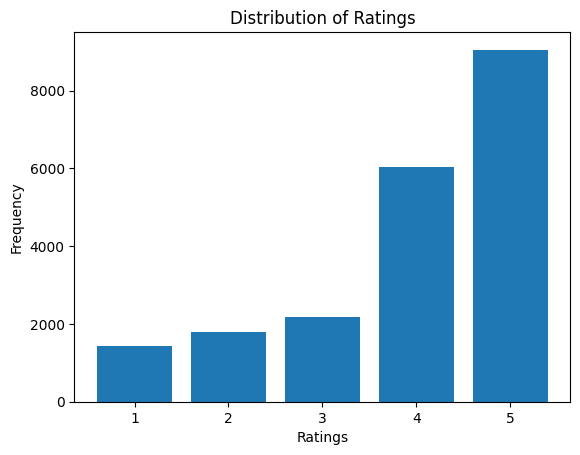

In [8]:
# Calculate the distribution of the 'rating' column
rating_counts = df['Rating'].value_counts().sort_index()

# Plot the bar chart
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# Show the plot
plt.show()

In [9]:
df['text_length'] = df['Review'].apply(lambda x: len(str(x)))

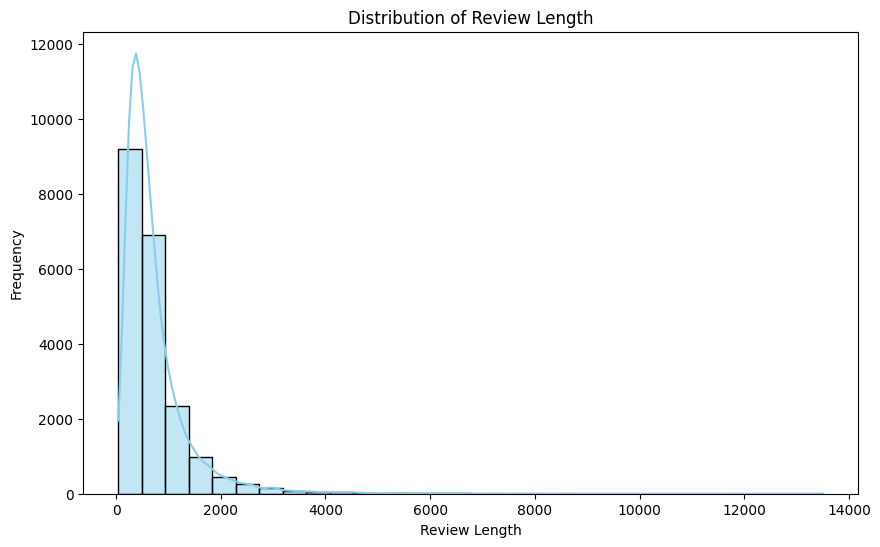

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'],bins=30,kde=True,color='skyblue')
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Text processing and visualization
import re
from wordcloud import WordCloud
import string
# NLTK for NLP tasks
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
# Download required NLTK datasets
nltk.download('punkt')       # Tokenizer data
nltk.download('punkt_tab')  # Downloads the Punkt tokenizer models
nltk.download('stopwords')   # Stopwords list
nltk.download('wordnet')     # For lemmatization
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [12]:
# Initialize tools
lemma = WordNetLemmatizer()
stop = set(stopwords.words('english')+list(string.punctuation))

In [13]:
def preprocess_review(review):
    # Remove HTML links and emojis
    review = re.sub(r'http\S+|www\S+|https\S+', '', review)  # Remove links
    review = re.sub(r'[^\w\s,]', '', review, flags=re.UNICODE)  # Remove emojis

    # Tokenize, lowercase, lemmatize, remove stopwords and non-alphabetic tokens
    tokens = word_tokenize(review.lower())
    lemmatized = [lemma.lemmatize(word) for word in tokens if word.isalpha() and word not in stop]

    # Join the lemmatized words
    text = ' '.join(lemmatized)
    return text

In [14]:
df['Cleaned_Review'] = df['Review'].apply(preprocess_review)

In [15]:
df['cleaned_text_length'] = df['Cleaned_Review'].apply(lambda x: len(str(x)))

In [16]:
df.head()

,Review,Rating,text_length,Cleaned_Review,cleaned_text_length
0,nice hotel expensive parking got good deal sta...,4,593,nice hotel expensive parking got good deal sta...,542
1,ok nothing special charge diamond member hilto...,2,1689,ok nothing special charge diamond member hilto...,1566
2,nice rooms not 4* experience hotel monaco seat...,3,1427,nice room experience hotel monaco seattle good...,1306
3,"unique, great stay, wonderful time hotel monac...",5,600,unique great stay wonderful time hotel monaco ...,562
4,"great stay great stay, went seahawk game aweso...",5,1281,great stay great stay went seahawk game awesom...,1171


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
df_subset = df.iloc[:10000]
tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_features = 10000)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df_subset['Cleaned_Review'])
X = tfidf_vectorizer_vectors.toarray()

In [18]:
from sklearn.model_selection import train_test_split
Y = df_subset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8,test_size=0.2, random_state=42)

<Axes: xlabel='Rating', ylabel='count'>

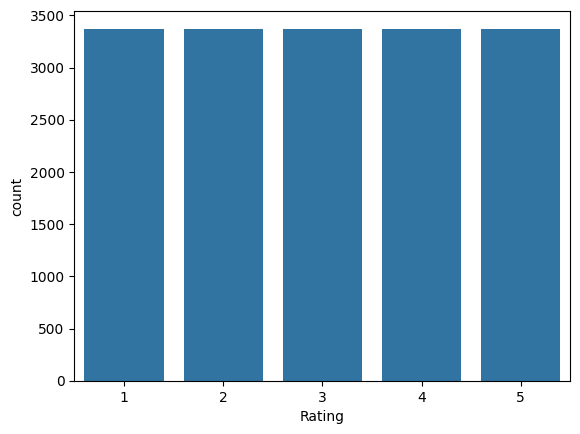

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=10)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
sns.countplot(x=y_resampled)

In [20]:
from sklearn.naive_bayes import MultinomialNB
# Initialize the logistic regression model
model = MultinomialNB()
model.fit(X_resampled,y_resampled)

MultinomialNB()

In [21]:
y_pred=model.predict(X_test)

In [22]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print(acc)
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
result=metrics.classification_report(y_test,y_pred)
print(result)

0.5355
[[ 91  43  10   3   2]
 [ 40  77  44  13   4]
 [ 15  64  99  67  13]
 [  4  50 111 272 159]
 [  5  26  43 213 532]]
              precision    recall  f1-score   support

           1       0.59      0.61      0.60       149
           2       0.30      0.43      0.35       178
           3       0.32      0.38      0.35       258
           4       0.48      0.46      0.47       596
           5       0.75      0.65      0.70       819

    accuracy                           0.54      2000
   macro avg       0.49      0.51      0.49      2000
weighted avg       0.56      0.54      0.55      2000



In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review and store them in new columns
df['compound'] = [senti.polarity_scores(review)['compound'] for review in df['Review']]
df['neg'] = [senti.polarity_scores(review)['neg'] for review in df['Review']]
df['neu'] = [senti.polarity_scores(review)['neu'] for review in df['Review']]
df['pos'] = [senti.polarity_scores(review)['pos'] for review in df['Review']]

# Display the first few rows of the updated DataFrame
df.head()


,Review,Rating,text_length,Cleaned_Review,cleaned_text_length,compound,neg,neu,pos
0,nice hotel expensive parking got good deal sta...,4,593,nice hotel expensive parking got good deal sta...,542,0.9747,0.072,0.643,0.285
1,ok nothing special charge diamond member hilto...,2,1689,ok nothing special charge diamond member hilto...,1566,0.9787,0.110,0.701,0.189
2,nice rooms not 4* experience hotel monaco seat...,3,1427,nice room experience hotel monaco seattle good...,1306,0.9889,0.081,0.700,0.219
3,"unique, great stay, wonderful time hotel monac...",5,600,unique great stay wonderful time hotel monaco ...,562,0.9912,0.060,0.555,0.385
4,"great stay great stay, went seahawk game aweso...",5,1281,great stay great stay went seahawk game awesom...,1171,0.9797,0.135,0.643,0.221


In [24]:
df[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,20491.000000,20491.000000,20491.000000,20491.000000
mean,0.803430,0.071908,0.617716,0.310376
std,0.455671,0.065673,0.101765,0.124714
min,-0.997400,0.000000,0.123000,0.000000
25%,0.918400,0.025000,0.556000,0.226000
50%,0.973800,0.059000,0.625000,0.303000
75%,0.988800,0.103000,0.687000,0.388000
max,0.999900,0.646000,1.000000,0.818000


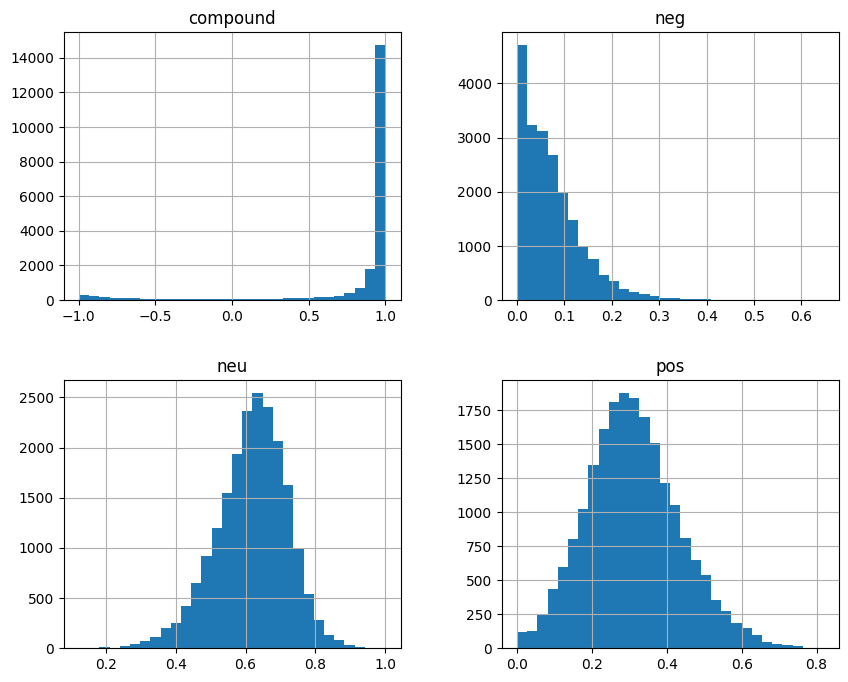

In [25]:
df[['compound', 'neg', 'neu', 'pos']].hist(bins=30, figsize=(10, 8))
plt.show()

In [26]:
sentiment_by_rating = df.groupby('Rating')[['compound', 'neg', 'neu', 'pos']].mean()
print(sentiment_by_rating)

        compound       neg       neu       pos
Rating                                        
1      -0.143056  0.180916  0.677996  0.141089
2       0.388476  0.134567  0.678489  0.186934
3       0.765821  0.093269  0.655656  0.251091
4       0.934647  0.059900  0.614453  0.325649
5       0.955704  0.045248  0.589246  0.365504


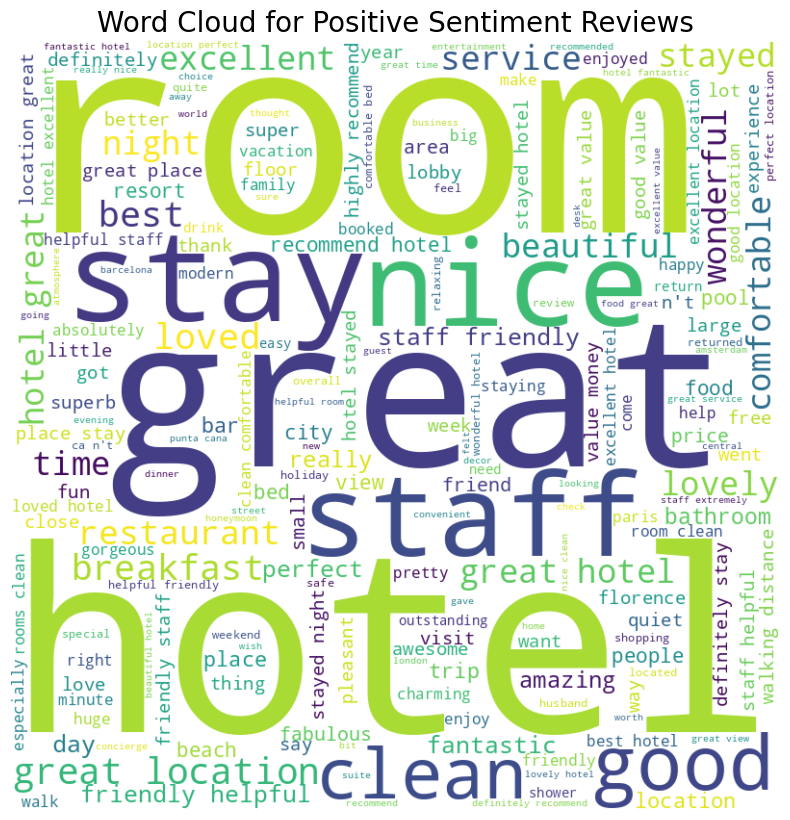

In [27]:
# Filter reviews with high positive sentiment (you can adjust the threshold)
reviews_positive_subset = df[df['pos'] > 0.5]  # Select reviews with >50% positive content

# Tokenize the words from the "Review" column (assuming reviews are preprocessed or clean)
pos_tokens = [word for review in reviews_positive_subset['Review'] for word in review.split()]

# Generate the word cloud for positive reviews
wordcloud = WordCloud(background_color='white', width=800, height=800).generate_from_text(' '.join(pos_tokens))

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment Reviews', fontsize=20)
plt.show()

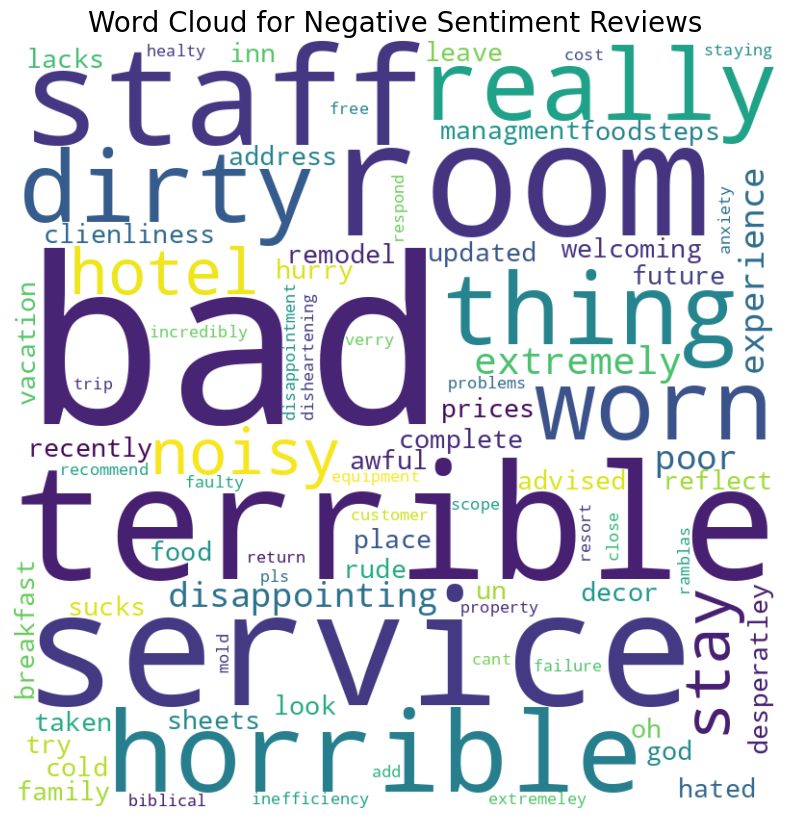

In [28]:
# Filter reviews with high negative sentiment (you can adjust the threshold)
reviews_negative_subset = df[df['neg'] > 0.5]  # Select reviews with >50% negative content

# Tokenize the words from the "Review" column (assuming reviews are preprocessed or clean)
neg_tokens = [word for review in reviews_negative_subset['Review'] for word in review.split()]

# Generate the word cloud for positive reviews
wordcloud = WordCloud(background_color='white', width=800, height=800).generate_from_text(' '.join(neg_tokens))

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment Reviews', fontsize=20)
plt.show()

In [29]:
from nltk.probability import FreqDist
pos_freqdist=FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

   hotel    great    staff     room location     good    clean friendly     nice    rooms 
    1819     1732      972      755      742      640      606      558      558      508 


In [30]:
from nltk.probability import FreqDist
neg_freqdist=FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

     bad    staff      not   really terrible    dirty     worn    hotel     room    stay, 
       6        3        3        2        2        2        2        2        2        2 


<Axes: xlabel='Samples', ylabel='Counts'>

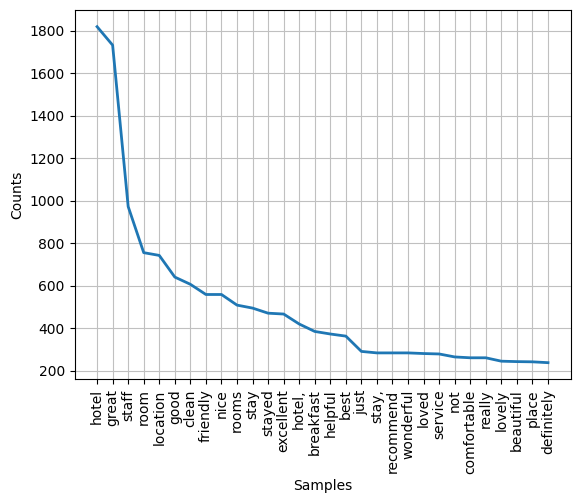

In [31]:
pos_freqdist.plot(30)

<Axes: xlabel='Samples', ylabel='Counts'>

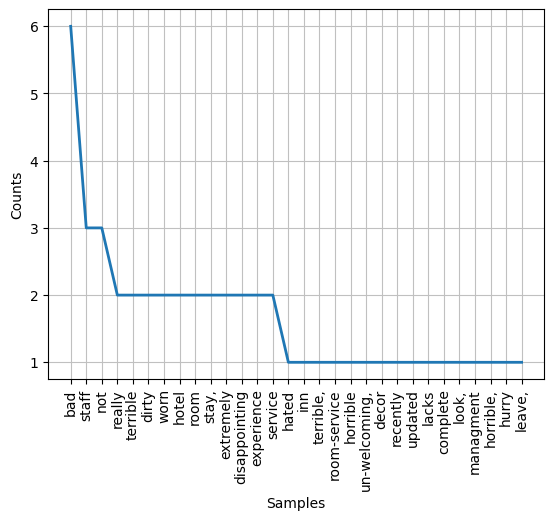

In [32]:
neg_freqdist.plot(30)